<a href="https://colab.research.google.com/github/positivejmk/2021-2-practice/blob/master/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#1. Load Data

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
df = pd.read_csv("/content/drive/MyDrive/BA team proj/공모전/nh_merge_final.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
df.shape

(681472, 49)

In [62]:
df.head()

,Unnamed: 0,Unnamed: 0.1,act_id,iem_cd,byn_dt,hold_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bse_dt,bnc_qty,tot_aet_amt,stk_par_pr,stk_p,weekday,weekday_vc,holdday_category_mean,holdday_category_sum,min,max,duration,TotalSales,OrderCount,AvgOrderValue,sales_intervaldays,price_perstock_mean,금가격,원달러환율,KOSPI지수 (1980.01.04=100),"거래량(주식시장, 잠정치) (만주)","거래대금(주식시장 , 잠정치) (억원)","외국인 순매수(주식시장, 잠정치) (억원)","주식시장-거래량(만주, 시간외거래분 포함) (만주)","주식시장-거래대금(억원, 시간외거래분 포함) (억원)","시가총액(주식시장, 잠정치) (억원)",KOSDAQ지수 (1996.07.01=1000),"거래량(만주 : 코스닥시장, 잠정치) (만주)","거래대금(억원 : 코스닥시장, 잠정치) (억원)","외국인 순매수(코스닥시장, 잠정치) (억원)"
0,0,0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,2018-07-26,11,1,9,3,2,2,9,5,5,8,101,1,1,1,20180726,274.0,11782000.0,5000.0,43000.0,3,140505,23.279391,267713,2016-01-04,2020-11-12,1774,36209.0,76,476.434211,23.342105,2.325581e-05,1228.59,1120.0,2289.06,29532,61114,1285,30333,63571,15309140,765.15,53644,35128,591
1,1,6,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005930,2018-01-31,80,1,9,3,2,2,9,5,5,8,1361,9,1,1,20180131,2.0,4990000.0,5000.0,2495000.0,2,134947,25.139455,1301721,2016-01-04,2020-11-12,1774,36209.0,76,476.434211,23.342105,4.008016e-07,1342.10,1067.0,2566.46,39690,107348,-6630,40305,108426,16685790,913.57,119526,75432,-1782
2,2,15,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005070,2018-05-17,5,1,9,3,2,2,9,5,5,8,2530,12,2,99,20180517,786.0,14619600.0,1000.0,18600.0,3,140505,21.796607,760658,2016-01-04,2020-11-12,1774,36209.0,76,476.434211,23.342105,5.376344e-05,1287.43,1081.5,2448.45,58898,80783,-2708,59677,81905,16345480,855.62,103744,54606,729
3,3,18,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A003520,2020-11-12,22,1,9,3,2,2,9,5,5,8,1969,8,2,1,20201112,60.0,462000.0,500.0,7700.0,3,140505,17.620062,618147,2016-01-04,2020-11-12,1774,36209.0,76,476.434211,23.342105,1.298701e-04,1867.50,1115.5,2475.62,125045,157200,4898,127869,164200,16983290,840.08,206889,110048,63
4,4,20,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A002310,2018-09-05,324,1,9,3,2,2,9,5,5,8,1696,10,3,99,20180905,183.0,8125200.0,5000.0,44400.0,2,134947,16.920504,2991782,2016-01-04,2020-11-12,1774,36209.0,76,476.434211,23.342105,2.252252e-05,1195.25,1123.5,2291.77,35203,52202,-980,35819,53905,15333130,820.00,66369,43497,256


#Per act_id Data

In [63]:
id_df = df.groupby('act_id').agg({
    'sales_intervaldays': min,
    'bnc_qty' : sum,
    'byn_dt' : lambda x: x.nunique()
})

id_df.columns = ['Intervaldays', 'TotalSales', 'OrderCount']

id_df

,Intervaldays,TotalSales,OrderCount
act_id,,,
0000c7a5a5a1db9c7e890da984b20d544c09cb6f51c5467ece45d5b35e99912a,34.875000,517.0,16
0007f3d10282e6f9de1eb445a64eb1f13e9ed2308cfbfa9b6e6efa399d0bdf31,8.964286,11925.0,28
0008d1bfac569bdb998897e2eb8519dec06b9277a686f4c6e06de582c9791b35,13.000000,33085.0,51
000a83a961cbcbce40673aed998effbd462fb10dcac8e64c6fa720f2150d3f5a,160.666667,3.0,3
000b92ca83a96312a0909b1f489340f4d399c86555012ffe2c41952ae43dc741,36.666667,4.0,3
...,...,...,...
ffdccfb9dc24cf41843f6e7f34704ccb73ac81acc29aa39b043fe7f90959e5f3,2.689286,812033.0,280
ffecc8e2823943ef1a7b0d9c6512f716a88032a1bdf7bace472b4365f5028535,9.795918,63726.0,49
ffee399294db1c721e010cbf3dae5c8a1f140dbaf2dcae96e7cd290e431aee0a,30.315789,4483.0,19


In [64]:
id_df.describe()

,Intervaldays,TotalSales,OrderCount
count,9337.000000,9.337000e+03,9337.000000
mean,25.897282,3.635851e+04,44.962515
std,39.633256,1.417177e+05,64.143509
min,0.000000,1.000000e+00,1.000000
25%,5.711111,5.030000e+02,8.000000
50%,12.800000,3.500000e+03,22.000000
75%,29.315789,1.981700e+04,55.000000
max,551.000000,4.093110e+06,738.000000


In [65]:
# rank(): 각 열마다 순위 값을 반환, index 축을 기준으로 보여줌
# 아무것도 지정하지 않으면 기본값인 오름 차순으로 순위를 정함 (낮은 숫자에서 높은 순으로)
# method: 동일값의 경우 순위 지정하는 방법 
#         average: average rank of the group (default)
#         min: lowest rank in the group
#         max: highest rank in the group
#         first: ranks assigned in order they appear in the array
#         dense: like ‘min’, but rank always increases by 1 between groups.

rank_df = id_df.rank(method='first')

In [66]:
rank_df.head()

,Intervaldays,TotalSales,OrderCount
act_id,,,
0000c7a5a5a1db9c7e890da984b20d544c09cb6f51c5467ece45d5b35e99912a,7419.0,2363.0,3776.0
0007f3d10282e6f9de1eb445a64eb1f13e9ed2308cfbfa9b6e6efa399d0bdf31,3587.0,6361.0,5260.0
0008d1bfac569bdb998897e2eb8519dec06b9277a686f4c6e06de582c9791b35,4708.0,7659.0,6797.0
000a83a961cbcbce40673aed998effbd462fb10dcac8e64c6fa720f2150d3f5a,9171.0,76.0,892.0
000b92ca83a96312a0909b1f489340f4d399c86555012ffe2c41952ae43dc741,7524.0,100.0,893.0


In [67]:
rank_df.describe()

,Intervaldays,TotalSales,OrderCount
count,9337.000000,9337.000000,9337.000000
mean,4669.000000,4669.000000,4669.000000
std,2695.504065,2695.504065,2695.504065
min,1.000000,1.000000,1.000000
25%,2335.000000,2335.000000,2335.000000
50%,4669.000000,4669.000000,4669.000000
75%,7003.000000,7003.000000,7003.000000
max,9337.000000,9337.000000,9337.000000


In [103]:
# 군집분석 전 데이터 스케일 표준화 
scaled_df = (rank_df - rank_df.mean()) / rank_df.std()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rank_df)

In [104]:
scaled_df

,Intervaldays,TotalSales,OrderCount
act_id,,,
0000c7a5a5a1db9c7e890da984b20d544c09cb6f51c5467ece45d5b35e99912a,1.020217,-0.855499,-0.331292
0007f3d10282e6f9de1eb445a64eb1f13e9ed2308cfbfa9b6e6efa399d0bdf31,-0.401409,0.627712,0.219254
0008d1bfac569bdb998897e2eb8519dec06b9277a686f4c6e06de582c9791b35,0.014469,1.109254,0.789463
000a83a961cbcbce40673aed998effbd462fb10dcac8e64c6fa720f2150d3f5a,1.670189,-1.703948,-1.401222
000b92ca83a96312a0909b1f489340f4d399c86555012ffe2c41952ae43dc741,1.059171,-1.695045,-1.400851
...,...,...,...
ffdccfb9dc24cf41843f6e7f34704ccb73ac81acc29aa39b043fe7f90959e5f3,-1.406416,1.712110,1.682060
ffecc8e2823943ef1a7b0d9c6512f716a88032a1bdf7bace472b4365f5028535,-0.304952,1.331105,0.774252
ffee399294db1c721e010cbf3dae5c8a1f140dbaf2dcae96e7cd290e431aee0a,0.898533,0.121684,-0.113522


In [105]:
scaled_data

array([[ 1.02027198, -0.85554443, -0.33131014],
       [-0.40143065,  0.62774552,  0.21926572],
       [ 0.01446931,  1.1093139 ,  0.78950501],
       ...,
       [ 0.89858136,  0.12169062, -0.11352845],
       [-0.79432811,  1.35195313,  0.25673753],
       [ 0.48787551, -1.03325726,  0.05676422]])

#2. Customer Segmentation via K-Means Clustering

In [106]:
from sklearn.cluster import KMeans

###-K-Means Clustering

In [107]:
kmeans = KMeans(n_clusters = 3, random_state = 10).fit(scaled_df[['Intervaldays', 'TotalSales', 'OrderCount']])

In [108]:
kmeans.labels_

array([1, 0, 0, ..., 1, 0, 1], dtype=int32)

In [109]:
kmeans.cluster_centers_

array([[-0.54266734,  0.81789741,  0.91964887],
       [ 0.9372993 , -0.48763854, -0.60426963],
       [-1.04560353, -1.10718839, -1.08259912]])

In [110]:
# copy: deep=True (default, 사본을 생성하하는데 원본 값이 바뀌어도 반영되지 않음) 
three_cluster_df = scaled_df[['Intervaldays', 'TotalSales', 'OrderCount']].copy(deep=True)
three_cluster_df['Cluster'] = kmeans.labels_

In [112]:
three_cluster_df.head()

,Intervaldays,TotalSales,OrderCount,Cluster
act_id,,,,
0000c7a5a5a1db9c7e890da984b20d544c09cb6f51c5467ece45d5b35e99912a,1.020217,-0.855499,-0.331292,1
0007f3d10282e6f9de1eb445a64eb1f13e9ed2308cfbfa9b6e6efa399d0bdf31,-0.401409,0.627712,0.219254,0
0008d1bfac569bdb998897e2eb8519dec06b9277a686f4c6e06de582c9791b35,0.014469,1.109254,0.789463,0
000a83a961cbcbce40673aed998effbd462fb10dcac8e64c6fa720f2150d3f5a,1.670189,-1.703948,-1.401222,1
000b92ca83a96312a0909b1f489340f4d399c86555012ffe2c41952ae43dc741,1.059171,-1.695045,-1.400851,1


In [113]:
# Cluster별 고객수 
three_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    4116
1    3882
2    1339
Name: TotalSales, dtype: int64

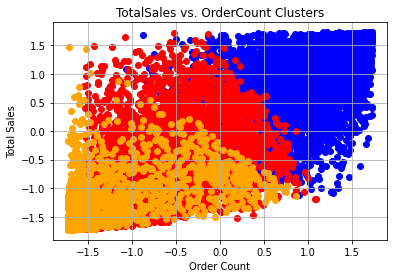

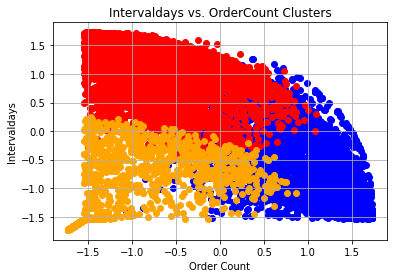

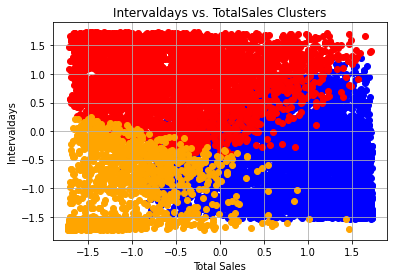

In [114]:
plt.scatter(
    three_cluster_df.loc[three_cluster_df['Cluster'] == 0]['OrderCount'], 
    three_cluster_df.loc[three_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    three_cluster_df.loc[three_cluster_df['Cluster'] == 1]['OrderCount'], 
    three_cluster_df.loc[three_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    three_cluster_df.loc[three_cluster_df['Cluster'] == 2]['OrderCount'], 
    three_cluster_df.loc[three_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    three_cluster_df.loc[three_cluster_df['Cluster'] == 3]['OrderCount'], 
    three_cluster_df.loc[three_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    three_cluster_df.loc[three_cluster_df['Cluster'] == 0]['OrderCount'], 
    three_cluster_df.loc[three_cluster_df['Cluster'] == 0]['Intervaldays'],
    c='blue'
)

plt.scatter(
    three_cluster_df.loc[three_cluster_df['Cluster'] == 1]['OrderCount'], 
    three_cluster_df.loc[three_cluster_df['Cluster'] == 1]['Intervaldays'],
    c='red'
)

plt.scatter(
    three_cluster_df.loc[three_cluster_df['Cluster'] == 2]['OrderCount'], 
    three_cluster_df.loc[three_cluster_df['Cluster'] == 2]['Intervaldays'],
    c='orange'
)

plt.scatter(
    three_cluster_df.loc[three_cluster_df['Cluster'] == 3]['OrderCount'], 
    three_cluster_df.loc[three_cluster_df['Cluster'] == 3]['Intervaldays'],
    c='green'
)

plt.title('Intervaldays vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Intervaldays')

plt.grid()
plt.show()

plt.scatter(
    three_cluster_df.loc[three_cluster_df['Cluster'] == 0]['TotalSales'], 
    three_cluster_df.loc[three_cluster_df['Cluster'] == 0]['Intervaldays'],
    c='blue'
)

plt.scatter(
    three_cluster_df.loc[three_cluster_df['Cluster'] == 1]['TotalSales'], 
    three_cluster_df.loc[three_cluster_df['Cluster'] == 1]['Intervaldays'],
    c='red'
)

plt.scatter(
    three_cluster_df.loc[three_cluster_df['Cluster'] == 2]['TotalSales'], 
    three_cluster_df.loc[three_cluster_df['Cluster'] == 2]['Intervaldays'],
    c='orange'
)

plt.scatter(
    three_cluster_df.loc[three_cluster_df['Cluster'] == 3]['TotalSales'], 
    three_cluster_df.loc[three_cluster_df['Cluster'] == 3]['Intervaldays'],
    c='green'
)

plt.title('Intervaldays vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Intervaldays')

plt.grid()
plt.show()

In [123]:
# 모델 평가: 데이비스-볼딘 지수
# 군집 내의 분리도와 군집 간의 분리도의 비율
# 지수값이 작을수록 좋은 군집 결과임 (군집 내의 분리도는 낮고 군집간의 분리도는 높음)

from sklearn.metrics import davies_bouldin_score

# kmeans = KMeans(n_clusters=3, random_state=10).fit(scaled_df[['TotalSales', 'OrderCount', 'Intervaldays']])
# labels = kmeans.labels_
davies_bouldin_score(scaled_df[['TotalSales', 'OrderCount', 'Intervaldays']], three_cluster_df['Cluster'])

0.8786119383694224

###-Interpreting Customer Segments

In [ ]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
high_value_cluster.head()

,Intervaldays,TotalSales,OrderCount,Cluster
act_id,,,,
00c87db0131a6286b48168ee95a318bf4b5c8ca1da3b32f139e25d49ba00a2aa,-0.321276,-1.230568,0.057132,2
00d5497ed7d096412d728282259df6788c0c06ef4f3708d87c24d8ccf27dc3b9,-1.731773,-1.715078,-1.731773,2
00e42e18f5cfaaaf235eee3af478012eda0455ccf3112c4510faf1dd06271ebf,-1.166387,-0.722314,0.502689,2
0104522fc596334fec689cdce04fdd3bdbc7f96b0974a2fa6b1cced066a93044,-1.731402,-1.239842,-1.731402,2
0125eb711033c269fa3c64473c2284a013df6b64886cd988e422b41334565003,-1.428675,-1.242439,-0.724540,2


In [ ]:
id_df.loc[high_value_cluster.index].describe()

,Intervaldays,TotalSales,OrderCount
count,1153.000000,1153.000000,1153.000000
mean,3.752681,713.465742,5.574154
std,4.026285,4331.187496,7.479132
min,0.000000,1.000000,1.000000
25%,0.000000,20.000000,1.000000
50%,2.666667,114.000000,2.000000
75%,7.000000,500.000000,7.000000
max,14.000000,104042.000000,55.000000


In [141]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(id_df)
scaled_data = robust_scaler.transform(id_df)

In [142]:
km = KMeans(n_clusters = 3, random_state = 10).fit(scaled_data)

In [143]:
centroid = km.cluster_centers_

In [144]:
print("표준화 군집중심 : \n", centroid)

표준화 군집중심 : 
 [[  0.57555259   0.83029922   0.41024675]
 [ -0.20227102  28.6322275    3.24204401]
 [ -0.35776948 136.38797418   6.12765957]]


In [139]:
# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
origin = robust_scaler.inverse_transform(centroid)

In [145]:
Original_centroid = robust_scaler.inverse_transform(centroid)
print("표준화 군집중심 : \n", Original_centroid)

표준화 군집중심 : 
 [[2.63857337e+01 1.95363991e+04 4.12815972e+01]
 [8.02545757e+00 5.56502842e+05 1.74376068e+02]
 [4.35496640e+00 2.63769733e+06 3.10000000e+02]]


In [146]:
centroid_df = pd.DataFrame(Original_centroid, columns = id_df.columns)
id_df_mean = id_df.mean()
centroid_df.loc['average'] = id_df_mean
display(centroid_df)

,Intervaldays,TotalSales,OrderCount
0,26.385734,1.953640e+04,41.281597
1,8.025458,5.565028e+05,174.376068
2,4.354966,2.637697e+06,310.000000
average,25.897282,3.635851e+04,44.962515
